In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

# Load the dataset
df = pd.read_excel(r"C:\Users\shara\Desktop\CLASSES\Project 1\Resources\Road Accident Data.xlsx")
df.head(5)

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [8]:
# Data Cleaning
df['Number_of_Casualties'] = df['Number_of_Casualties'].astype(int)
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].astype(int)
df = df.drop_duplicates()
df.head(5)

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [10]:
# Data Cleaning
df = df.set_index('Accident_Index')
df = df.drop(['Day_of_Week','Junction_Control', 'Junction_Detail', 'Latitude','Local_Authority_(District)','Carriageway_Hazards','Longitude','Police_Force'], axis=1)

df.head()

,Accident Date,Month,Year,Accident_Severity,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Accident_Index,,,,,,,,,,,,,,
200901BS70001,2021-01-01,Jan,2021,Serious,Daylight,1,2,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
200901BS70002,2021-01-05,Jan,2021,Serious,Daylight,11,2,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
200901BS70003,2021-01-04,Jan,2021,Slight,Daylight,1,2,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
200901BS70004,2021-01-05,Jan,2021,Serious,Daylight,1,2,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
200901BS70005,2021-01-06,Jan,2021,Serious,Darkness - lights lit,1,2,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [12]:
# Data Cleaning

# Convert Accident Date to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d/%m/%Y')

# Convert Time to datetime and extract time (including seconds)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
# Convert Time to speed limi and extract time (including seconds)
df["Speed_limit"] = pd.to_numeric(df["Speed_limit"], errors="coerce").astype("Int64")

df.head(5)

,Accident Date,Month,Year,Accident_Severity,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Accident_Index,,,,,,,,,,,,,,
200901BS70001,2021-01-01,Jan,2021,Serious,Daylight,1,2,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
200901BS70002,2021-01-05,Jan,2021,Serious,Daylight,11,2,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
200901BS70003,2021-01-04,Jan,2021,Slight,Daylight,1,2,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
200901BS70004,2021-01-05,Jan,2021,Serious,Daylight,1,2,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
200901BS70005,2021-01-06,Jan,2021,Serious,Darkness - lights lit,1,2,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [14]:
# Data Analysis
print(df.describe())
print(df['Accident_Severity'].value_counts())
print(df.groupby('Accident_Severity')['Number_of_Casualties'].mean())

                       Accident Date           Year  Number_of_Casualties  \
count                         307972  307972.000000         307972.000000   
mean   2021-12-23 22:21:18.537009664    2021.468935              1.356883   
min              2021-01-01 00:00:00    2021.000000              1.000000   
25%              2021-06-28 00:00:00    2021.000000              1.000000   
50%              2021-12-08 00:00:00    2021.000000              1.000000   
75%              2022-06-25 00:00:00    2022.000000              1.000000   
max              2022-12-31 00:00:00    2022.000000             48.000000   
std                              NaN       0.499035              0.815858   

       Number_of_Vehicles  Speed_limit  
count       307972.000000     307972.0  
mean             1.829066    38.866001  
min              1.000000         10.0  
25%              1.000000         30.0  
50%              2.000000         30.0  
75%              2.000000         50.0  
max             32.

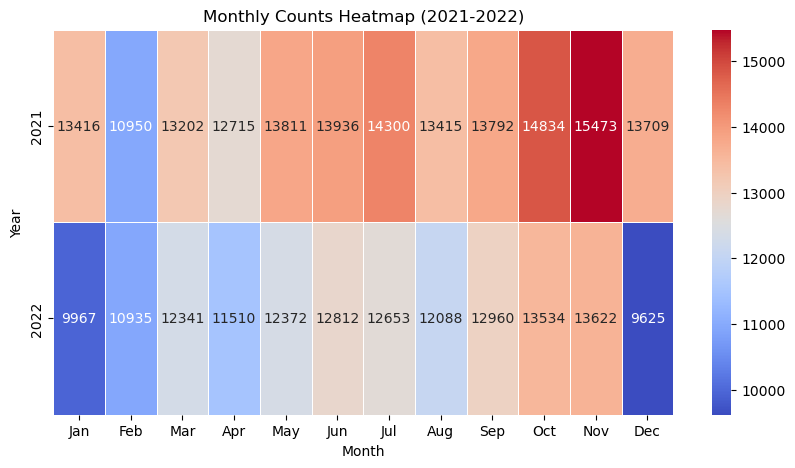

In [18]:
month_year_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_year_counts['Month'] = pd.Categorical(month_year_counts['Month'], categories=month_order, ordered=True)

month_year_counts = month_year_counts.sort_values(by=['Year', 'Month'])

df_2021 = month_year_counts[month_year_counts['Year'] == 2021]
df_2022 = month_year_counts[month_year_counts['Year'] == 2022]

merged_df = pd.merge(df_2021, df_2022, on=["Year","Month","Count"], how="outer")
merged_df

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Create pivot table
pivot_table = merged_df.pivot(index="Year", columns="Month", values="Count")

# Generate heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)

plt.title("Monthly Counts Heatmap (2021-2022)")
plt.xlabel("Month")
plt.ylabel("Year")
# Save the figure as a file before displaying
plt.savefig("monthly_accident_counts_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


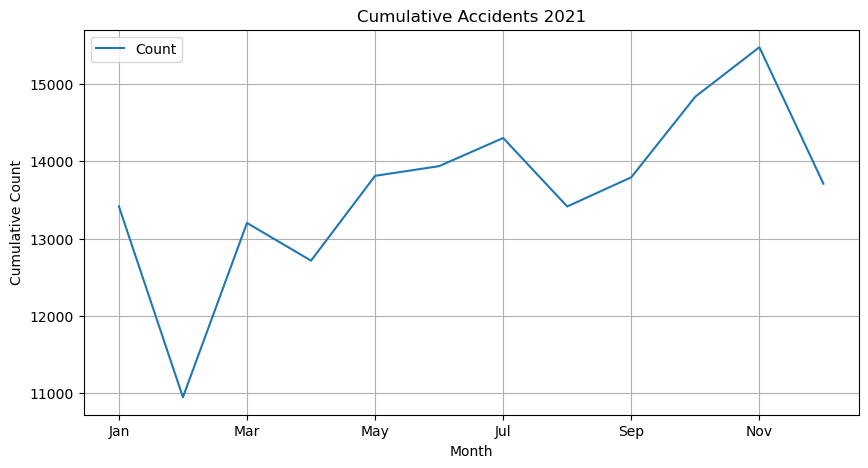

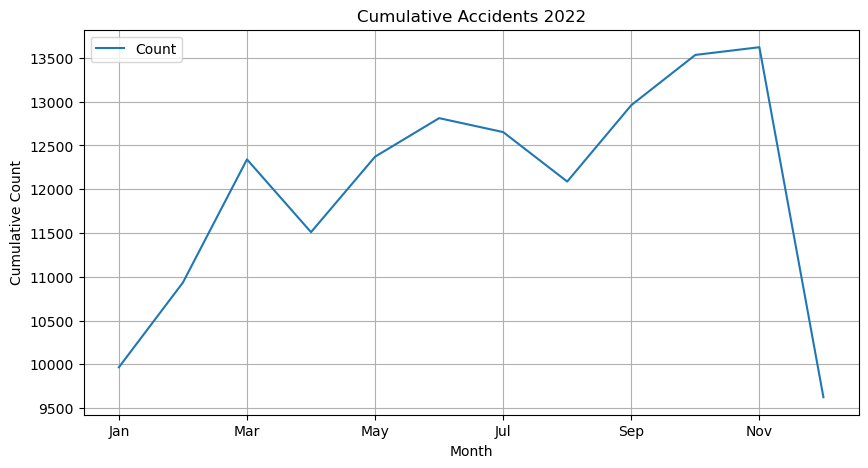

In [22]:
df_2021.plot(x='Month', y='Count', kind='line', figsize=(10, 5), 
             title='Cumulative Accidents 2021', ylabel='Cumulative Count', xlabel='Month', grid=True, linestyle='-')

plt.savefig("cumulative_accidents_2021.png", dpi=300)  # Save the figure
df_2022.plot(x='Month', y='Count', kind='line', figsize=(10, 5), 
             title='Cumulative Accidents 2022', ylabel='Cumulative Count', xlabel='Month', grid=True, linestyle='-')

plt.savefig("cumulative_accidents_2022.png", dpi=300)


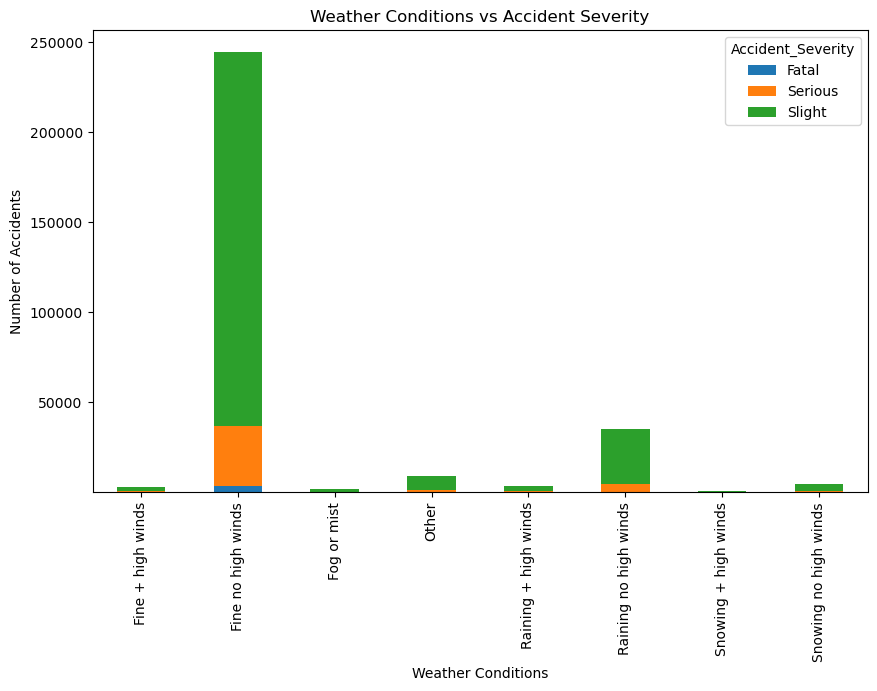

In [24]:
pd.crosstab(df['Weather_Conditions'], df['Accident_Severity']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Weather Conditions vs Accident Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
# Save the figure
plt.savefig('weather_vs_accident_severity.png', dpi=300, bbox_inches='tight')
plt.show()


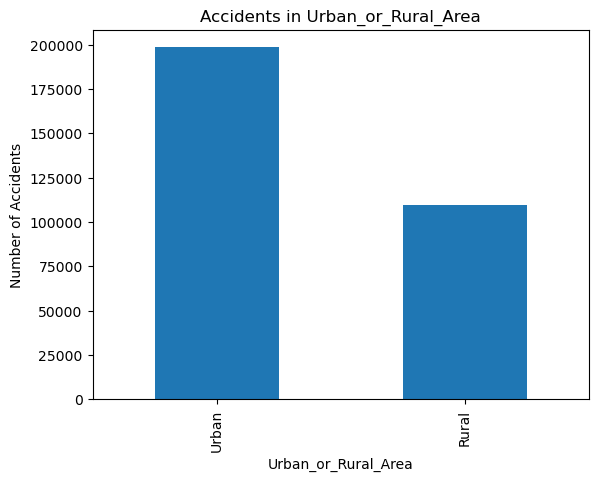

In [26]:
# Data Visualization-Accidents relation to urban or rural area
df['Urban_or_Rural_Area'].value_counts().plot(kind='bar')
plt.title('Accidents in Urban_or_Rural_Area')
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Number of Accidents')
# Save the figure
plt.savefig('accidents_urban_rural.png', dpi=300, bbox_inches='tight')
plt.show()

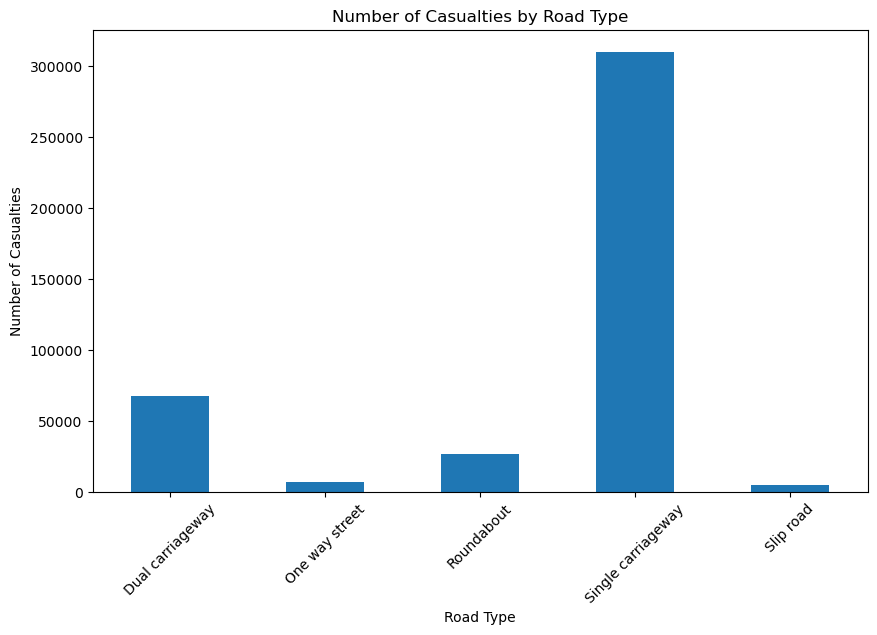

In [28]:
# Group by 'Road_Type' and calculate the mean number of casualties
casualties_by_road_type = df.groupby('Road_Type')['Number_of_Casualties'].sum()

# Plot as a bar chart
plt.figure(figsize=(10, 6))
casualties_by_road_type.plot(kind='bar')

# Set titles and labels
plt.title('Number of Casualties by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Save the figure
plt.savefig("casualties_by_road_type.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

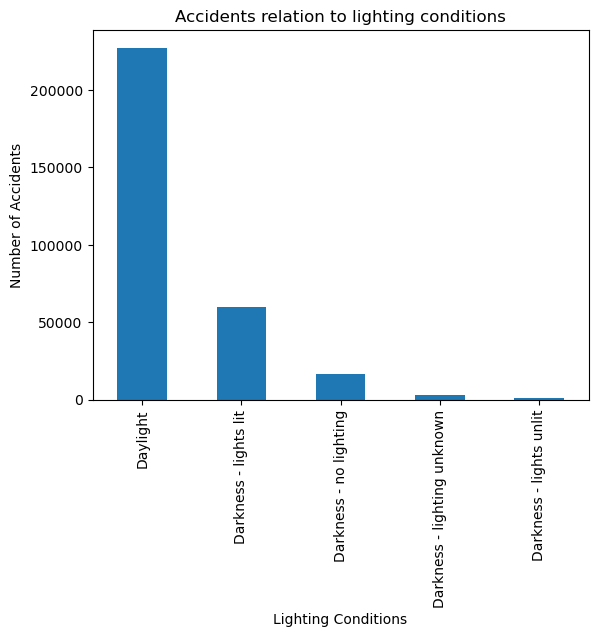

In [30]:
# Data Visualization-Accidents relation to Lighting Conditions
df['Light_Conditions'].value_counts().plot(kind='bar')
plt.title('Accidents relation to lighting conditions')
plt.xlabel('Lighting Conditions')
plt.ylabel('Number of Accidents')
# Save the figure 
plt.savefig('accidents_lighting_conditions.png', dpi=300, bbox_inches='tight')
plt.show()

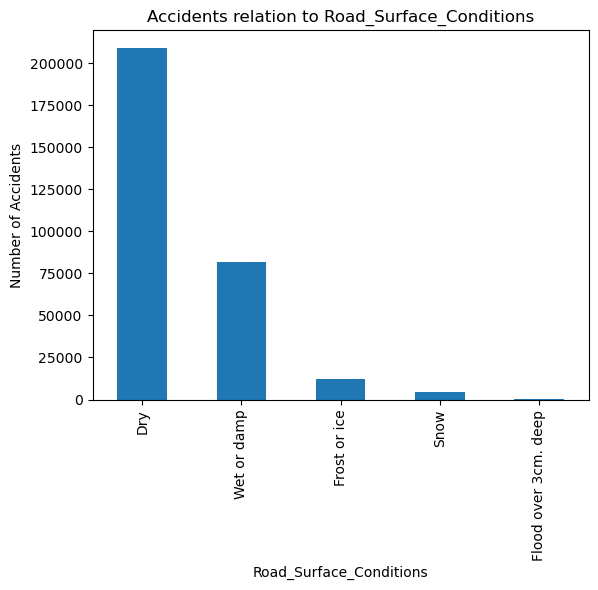

In [32]:
# Data Visualization-Accidents relation to Road_Surface_Conditions
df['Road_Surface_Conditions'].value_counts().plot(kind='bar')
plt.title('Accidents relation to Road_Surface_Conditions')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Number of Accidents')
# Save the figure to a file
plt.savefig('accidents_relation_to_road_surface_conditions.png')
plt.show()

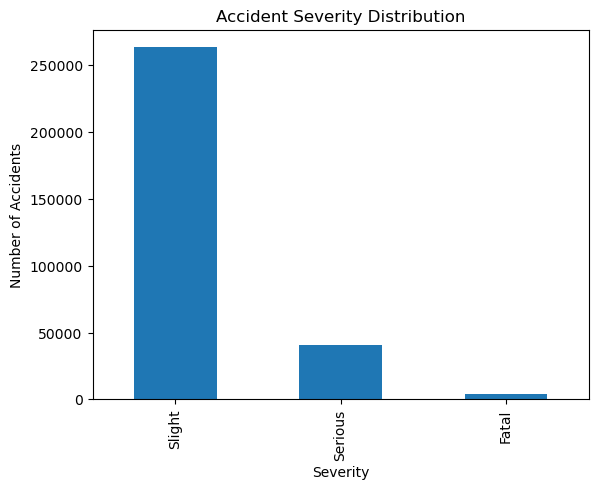

In [34]:
# Data Visualization
df['Accident_Severity'].value_counts().plot(kind='bar')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.savefig('accident_severity_distribution.png')  # Save the figure
plt.show()